In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import pickle
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
from wordcloud import WordCloud

/Users/brensikeg/opt/anaconda3/envs/daen690/lib/python3.8/site-packages/matplotlib/__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/brensikeg/opt/anaconda3/envs/daen690/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/brensikeg/opt/anaconda3/envs/daen690/lib/python3.8/site-packages/matplotlib/__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/brensikeg/opt/anaconda3/envs/daen690/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/brensikeg/opt/anaconda3/envs/daen690/lib/pyth

In [3]:
# Read pickle file with topics and augmented text
df4 = pd.read_pickle("data/allData.pkl")

In [4]:
corpus = df4['TEXT'].values

count_vect = CountVectorizer(stop_words=stopwords.words('english'), lowercase=True)
x_counts = count_vect.fit_transform(corpus)
x_counts.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [5]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x_counts)

In [6]:
dimension = 8
sample_size = 100000

np.random.seed(232323)
sample = x_tfidf[np.random.choice(x_tfidf.shape[0], sample_size, replace=False), :]


lda = LDA(n_components = dimension, random_state=9999)
lda_array = lda.fit_transform(sample)

In [7]:
topic_vec = lda.transform(x_tfidf)

df4['TOPIC'] = np.argmax(topic_vec, axis = 1)

In [8]:
df4.to_pickle("data/allData.pkl")

In [9]:
pyLDAvis.enable_notebook()

In [10]:
pyLDAvis.sklearn.prepare(lda, x_tfidf, count_vect, sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.152434  0.157355       1        1  12.716643
1      0.169865  0.080659       2        1   4.507364
2     -0.095938 -0.207287       3        1  18.845987
3      0.177803 -0.100295       4        1  10.583708
4      0.055714  0.134977       5        1   7.104289
5      0.127272 -0.027651       6        1  13.627728
6     -0.158881  0.012096       7        1  16.678621
7     -0.123402 -0.049855       8        1  15.935660, topic_info=              Term          Freq         Total Category  logprob  loglift
77371         time  48846.000000  48846.000000  Default  30.0000  30.0000
626         active  47447.000000  47447.000000  Default  29.0000  29.0000
27151       flight  49322.000000  49322.000000  Default  28.0000  28.0000
27619         foot  64463.000000  64463.000000  Default  27.0000  27.0000
21776      eastern  52914.000000  52914.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1568           agl   5505.172424  29275.666785   Topic8  -5.0818   0.1655
43484        level   5573.760677  31663.186182   Topic8  -5.0695   0.0995
76535  temperature   5837.846518  55398.484612   Topic8  -5.0232  -0.4136
319       absolute   5822.235385  54695.285695   Topic8  -5.0258  -0.4035
54063       notamc   5165.668482  34030.946833   Topic8  -5.1455  -0.0486

[524 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
168        1  0.972135  abel
168        2  0.004897  abel
168        3  0.004897  abel
168        4  0.004897  abel
168        5  0.004897  abel
...      ...       ...   ...
87414      4  0.966240   zmp
87414      5  0.005667   zmp
87414      6  0.005667   zmp
87414      7  0.005667   zmp
87414      8  0.005667   zmp

[3384 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
#pyLDAvis.sklearn.prepare(lda, x_tfidf, count_vect, mds='mmds')

In [12]:
#pyLDAvis.sklearn.prepare(lda, x_tfidf, count_vect, mds='tsne')

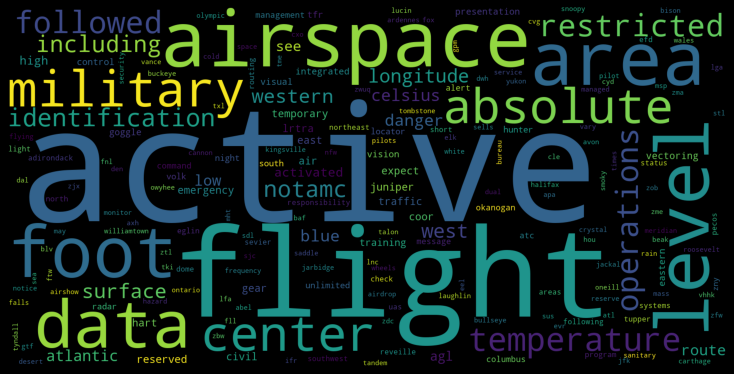

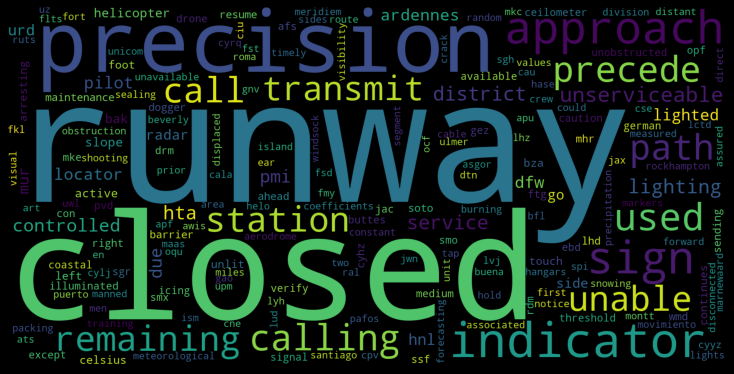

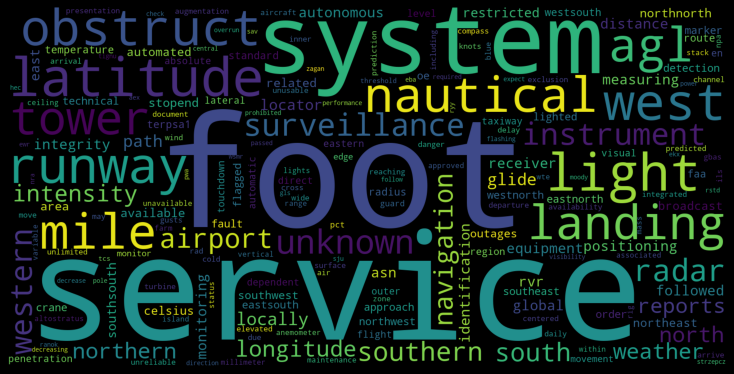

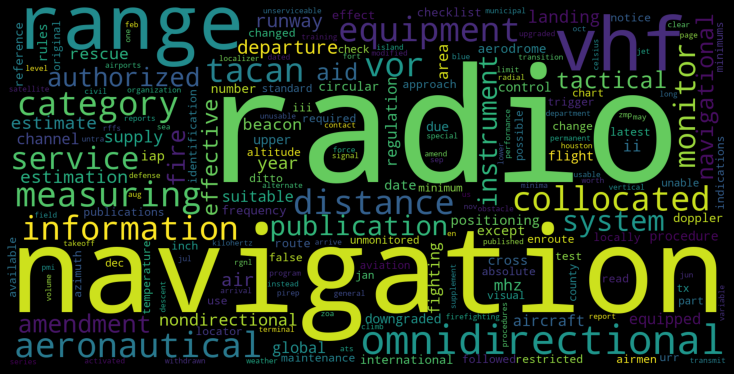

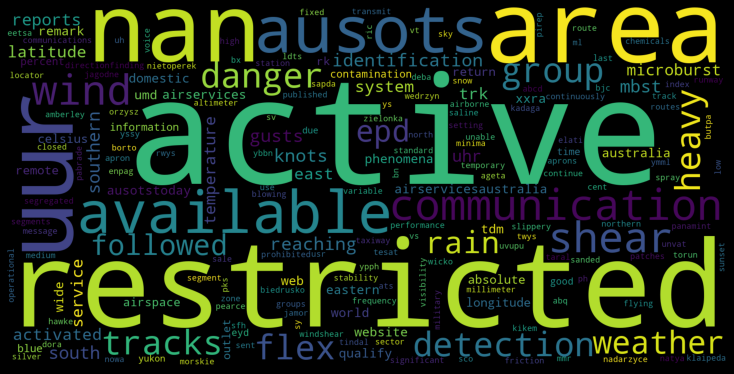

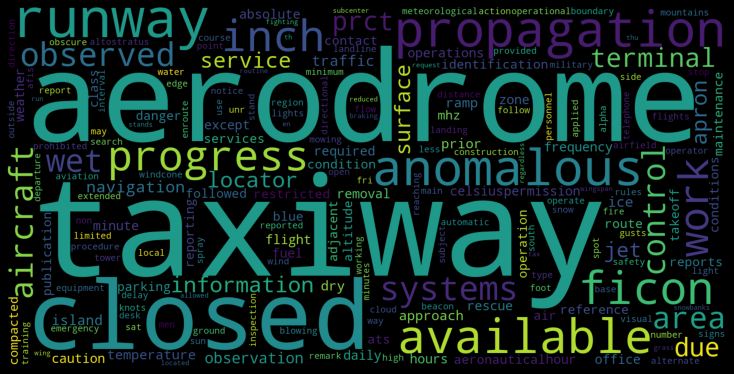

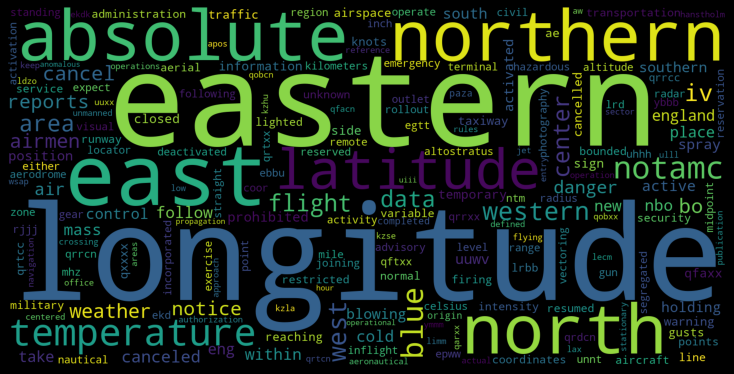

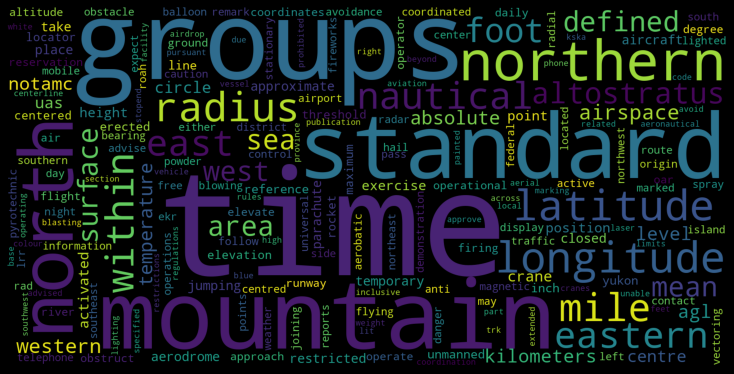

/Users/brensikeg/opt/anaconda3/envs/daen690/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/brensikeg/opt/anaconda3/envs/daen690/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/brensikeg/opt/anaconda3/envs/daen690/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/brensikeg/opt/anaconda3/envs/daen690/lib/python3.8/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/brensikeg/opt/anaconda3/envs/daen690/lib/pytho

In [13]:
features = count_vect.get_feature_names_out()

for dim in range(dimension):
    output = {}
    for idx, i in enumerate(lda.components_[dim]):
        output[features[idx]] = i

    wordcloud = WordCloud(width=1600, height=800).fit_words(output)

    plt.figure(figsize=(15,5), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()